In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [11]:
IMG_SIZE = [224, 224]

TRAIN_DIR = 'chest_xray/train'
TEST_DIR = 'chest_xray/test'

In [22]:
VGG = VGG16(input_shape=IMG_SIZE + [3], weights='imagenet', include_top=False)

for layer in VGG.layers:
    layer.trainable = False
    
folders = glob('chest_xray/train/*')

X = Flatten()(VGG.output)

prediction = Dense(len(folders), activation='softmax')(X)

model = Model(inputs=VGG.input, outputs=prediction)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, 
                                    zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_data_gen.flow_from_directory('chest_xray/train', target_size = (224, 224), 
                                               batch_size = 32, class_mode = 'categorical')
test_set = test_data_gen.flow_from_directory('chest_xray/test', target_size = (224, 224),
                                            batch_size = 32, class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [39]:
m = model.fit_generator(train_set, validation_data=test_set, epochs=5, 
                        steps_per_epoch=len(train_set), validation_steps = len(test_set))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
163/163 [==============================] - 3115s 19s/step - loss: 0.2361 - acc: 0.9133 - val_loss: 0.2744 - val_acc: 0.9087
Epoch 2/5
163/163 [==============================] - 3066s 19s/step - loss: 0.1101 - acc: 0.9597 - val_loss: 0.3673 - val_acc: 0.8878
Epoch 3/5
163/163 [==============================] - 3395s 21s/step - loss: 0.1057 - acc: 0.9584 - val_loss: 0.3109 - val_acc: 0.9167
Epoch 4/5
163/163 [==============================] - 3099s 19s/step - loss: 0.0854 - acc: 0.9672 - val_loss: 0.2848 - val_acc: 0.9151
Epoch 5/5
163/163 [==============================] - 3316s 20s/step - loss: 0.0782 - acc: 0.9724 - val_loss: 0.2716 - val_acc: 0.8974


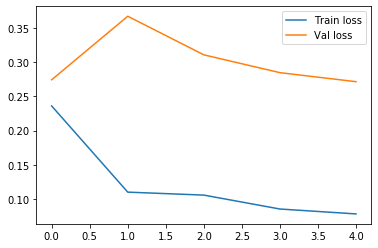

In [47]:
plt.plot(m.history['loss'], label='Train loss')
plt.plot(m.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

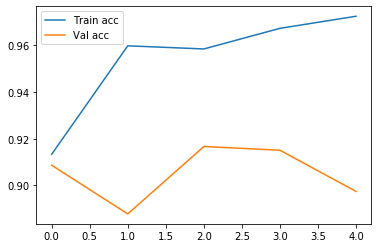

In [46]:
plt.plot(m.history['acc'], label='Train acc')
plt.plot(m.history['val_acc'], label='Val acc')
plt.legend()
plt.show()

In [50]:
model.save('ModelVGG.h5')

In [72]:
model = load_model('ModelVGG.h5')

IMG1 = image.load_img('chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg', target_size=(224, 224))
IMG2 = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size=(224, 224))

X1 = image.img_to_array(IMG1)
X1 = np.expand_dims(X1, axis=0)

X2 = image.img_to_array(IMG2)
X2 = np.expand_dims(X2, axis=0)

IMG1_data = preprocess_input(X1)
predictionF = model.predict(IMG1_data)

IMG2_data = preprocess_input(X2)
predictionS = model.predict(IMG2_data)

if round(predictionF[0][0])==1:
    print('The first person is not suffering from pneumonia.')
else:
    print('The first person is suffering from pneumonia.')
    
if round(predictionS[0][0])==1:
    print('The second person is not suffering from pneumonia.')
else:
    print('The second person is suffering from pneumonia.')

The first person is suffering from pneumonia.
The second person is not suffering from pneumonia.
